In this analysis, I have done a basic EDA of features and I have selected k-best features out of both linear features and from polynomial features and have applied regression on top of it to find the maximum r_squared value that I am able to acheive from the data.

Introduction
$Importing dataset and exploration
$Exploratory data analysis
$Pre-processing for modeling
$Modeling
$Backward selection for variable selection on linear regression
$Polynomial features for modeling
$Conclusion

In [3]:
#importing all neccessary datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neural_network import MLPRegressor

In [4]:
#importing and readng the dataset

data_vw=pd.read_csv('vw.csv')
data_vw.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5


Seeing if there are any missing values in the records

In [5]:
data_vw.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

Nice :) it is a nice and clean data, very good one to work with!

In [6]:
data_vw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   tax           15157 non-null  int64  
 7   mpg           15157 non-null  float64
 8   engineSize    15157 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.0+ MB


In [7]:
data_vw.describe()

,year,price,mileage,tax,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,112.744277,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,63.482617,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,30.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,145.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,145.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,580.000000,188.300000,3.200000


In [8]:
data_vw.shape

(15157, 9)

In [9]:
data_vw.size

136413

# Exploratory data analysis

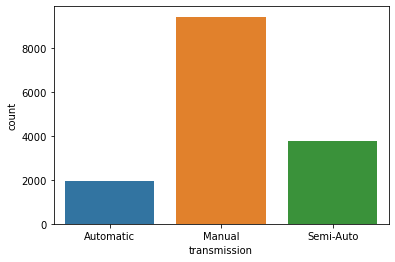

In [10]:
sns.countplot(data_vw['transmission'])

Most of the cars on the dataset are with manual transmission with very few cars in automatic and seim automatic transmission






 Golf               0.320842
 Polo               0.216863
 Tiguan             0.116448
 Passat             0.060368
 Up                 0.058323
 T-Roc              0.048360
 Touareg            0.023949
 Touran             0.023224
 T-Cross            0.019793
 Golf SV            0.017682
 Sharan             0.017154
 Arteon             0.016362
 Scirocco           0.015966
 Amarok             0.007323
 Caravelle          0.006664
 CC                 0.006268
 Tiguan Allspace    0.006004
 Beetle             0.005476
 Shuttle            0.004025
 Caddy Maxi Life    0.003893
 Jetta              0.002111
 California         0.000990
 Caddy Life         0.000528
 Eos                0.000462
 Caddy              0.000396
 Fox                0.000264
 Caddy Maxi         0.000264
Name: model, dtype: float64


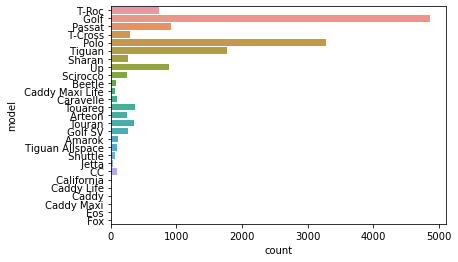

In [11]:
print(data_vw['model'].value_counts()/len(data_vw))
sns.countplot(y=data_vw['model'])

Top 3 cars are Golf, Polo and Tiguan on the dataset constuite 64% of all the VW cars, with all other cars contributing to 36%

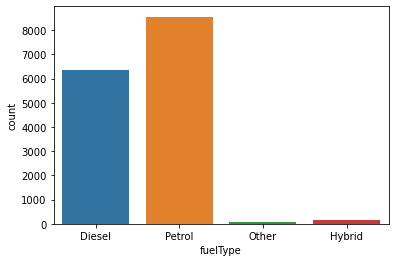

In [12]:
sns.countplot(data_vw['fuelType'])

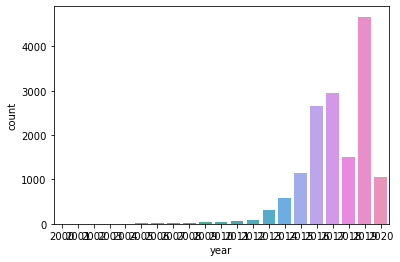

In [13]:
sns.countplot(data_vw['year'])

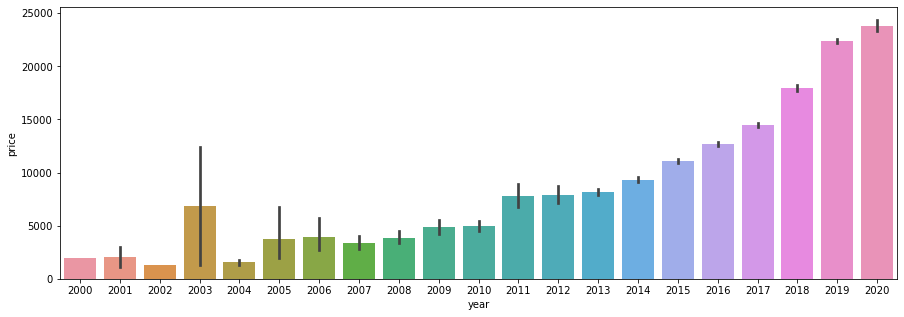

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(x=data_vw['year'],y=data_vw['price'])

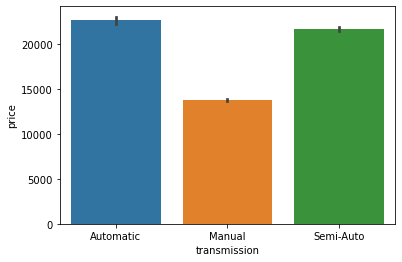

In [15]:
sns.barplot(x=data_vw['transmission'],y=data_vw['price'])

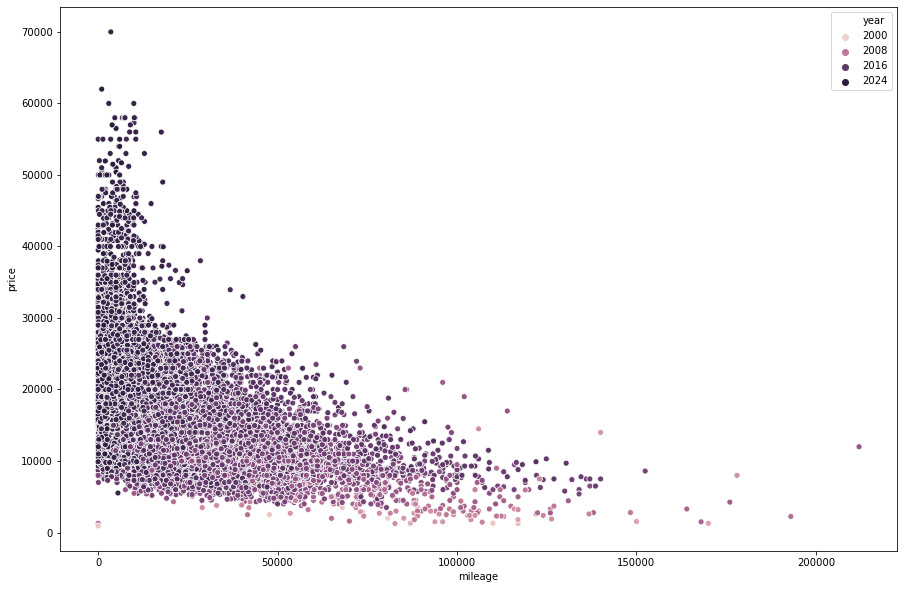

In [16]:
plt.figure(figsize=(15,10))
sns.scatterplot(data_vw['mileage'],data_vw['price'],hue=data_vw['year'])


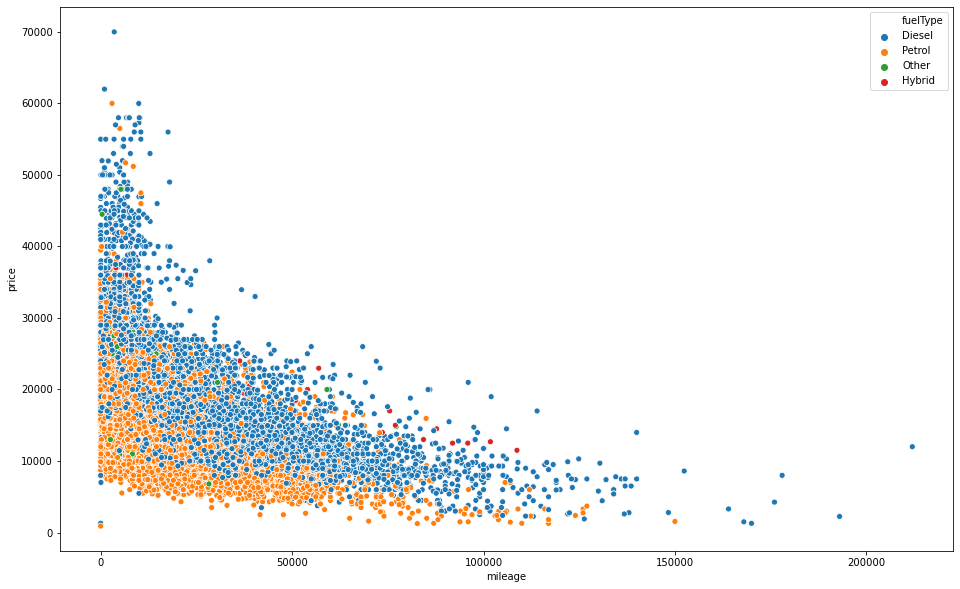

In [17]:
plt.figure(figsize=(16,10))
sns.scatterplot(data_vw['mileage'], data_vw['price'],hue=data_vw['fuelType'])

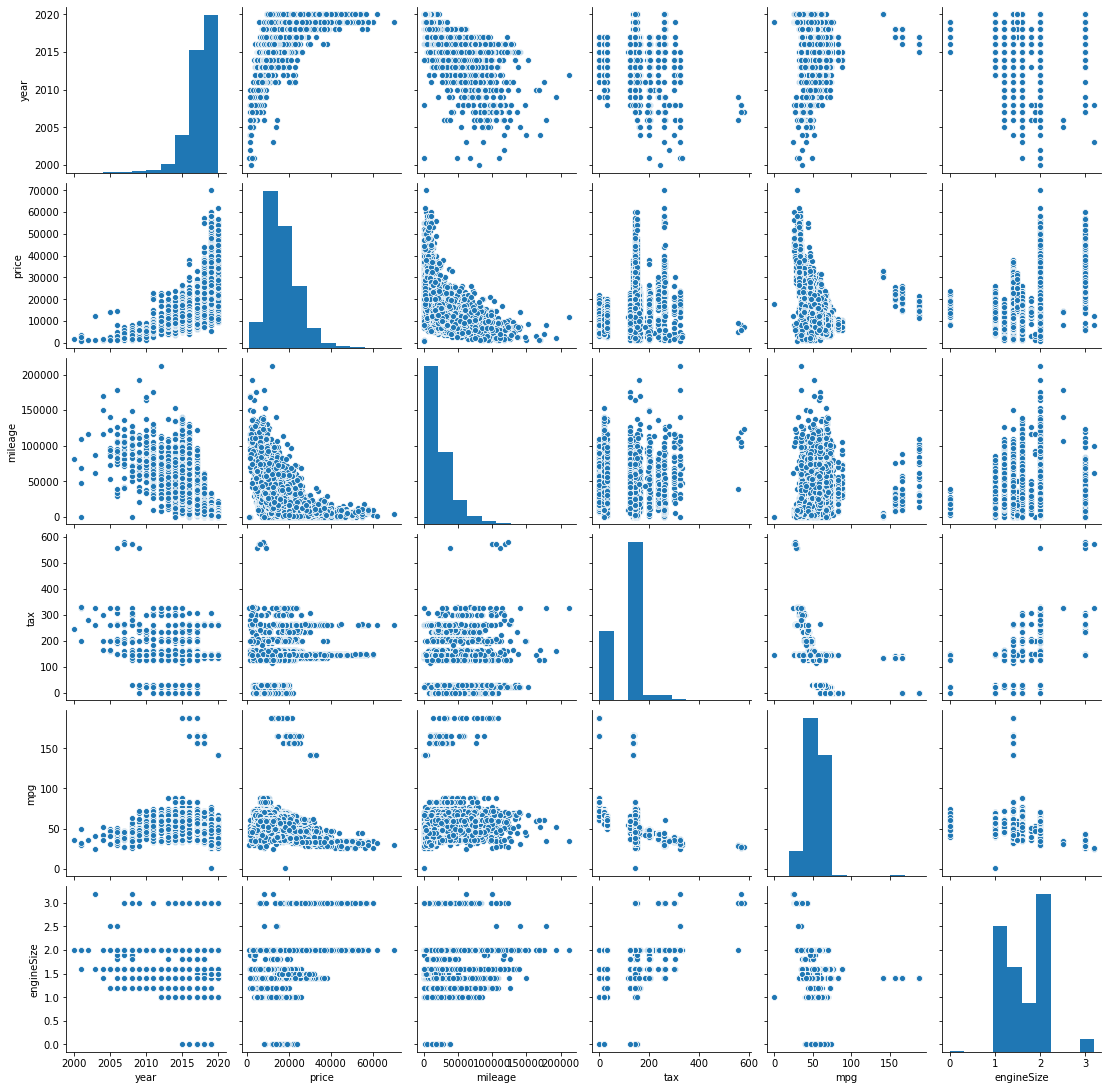

In [18]:
sns.pairplot(data_vw)

In [20]:
data_vw['age_of_car']=2020-data_vw['year']
data_vw=data_vw.drop(columns=['year'])
data_vw.head(10)

,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age_of_car
0,T-Roc,25000,Automatic,13904,Diesel,145,49.6,2.0,1
1,T-Roc,26883,Automatic,4562,Diesel,145,49.6,2.0,1
2,T-Roc,20000,Manual,7414,Diesel,145,50.4,2.0,1
3,T-Roc,33492,Automatic,4825,Petrol,145,32.5,2.0,1
4,T-Roc,22900,Semi-Auto,6500,Petrol,150,39.8,1.5,1
5,T-Roc,31895,Manual,10,Petrol,145,42.2,1.5,0
6,T-Roc,27895,Manual,10,Petrol,145,42.2,1.5,0
7,T-Roc,39495,Semi-Auto,10,Petrol,145,32.5,2.0,0
8,T-Roc,21995,Manual,10,Petrol,145,44.1,1.0,1
9,T-Roc,23285,Manual,10,Petrol,145,42.2,1.5,1


# Pre-processing for modeling

I like to use pd.get_dummies option over OHE in SKLearn to get the one hot encoded variables for the categorical variables. It is usually tidy on the dataset and the column names are preserved.

In [21]:
data_vw_expanded=pd.get_dummies(data_vw)
data_vw_expanded.head()

,price,mileage,tax,mpg,engineSize,age_of_car,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,...,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,25000,13904,145,49.6,2.0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,26883,4562,145,49.6,2.0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,20000,7414,145,50.4,2.0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,33492,4825,145,32.5,2.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,22900,6500,150,39.8,1.5,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


Applying the standard scalar option to standardize all the variables in the dataset.

In [24]:
std = StandardScaler()
data_vw_expanded_std = std.fit_transform(data_vw_expanded)
data_vw_expanded_std = pd.DataFrame(data_vw_expanded_std, columns = data_vw_expanded.columns)
print(data_vw_expanded_std.shape)
data_vw_expanded_std.head()

(15157, 40)


,price,mileage,tax,mpg,engineSize,age_of_car,model_ Amarok,model_ Arteon,model_ Beetle,model_ CC,...,model_ Touareg,model_ Touran,model_ Up,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,1.052392,-0.387209,0.508120,-0.304459,0.864902,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,...,-0.156643,-0.154194,-0.248868,2.594834,-1.280856,-0.576411,1.174175,-0.09828,-0.075981,-1.138035
1,1.295211,-0.828948,0.508120,-0.304459,0.864902,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,...,-0.156643,-0.154194,-0.248868,2.594834,-1.280856,-0.576411,1.174175,-0.09828,-0.075981,-1.138035
2,0.407627,-0.694090,0.508120,-0.245816,0.864902,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,...,-0.156643,-0.154194,-0.248868,-0.385381,0.780728,-0.576411,1.174175,-0.09828,-0.075981,-1.138035
3,2.147462,-0.816512,0.508120,-1.557966,0.864902,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,...,-0.156643,-0.154194,-0.248868,2.594834,-1.280856,-0.576411,-0.851661,-0.09828,-0.075981,0.878707
4,0.781591,-0.737309,0.586884,-1.022843,-0.218101,-0.849595,-0.085892,-0.128974,-0.074204,-0.079418,...,-0.156643,-0.154194,-0.248868,-0.385381,-1.280856,1.734874,-0.851661,-0.09828,-0.075981,0.878707


In [26]:
X_train,X_test,y_train,y_test=train_test_split(data_vw_expanded_std.drop(columns=['price']),data_vw_expanded_std[['price']])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11367, 39)
(3790, 39)
(11367, 1)
(3790, 1)


# Modeling
Selecting best features for model
Since ther are 40 variables in the dataset after the one hot encoding, I am using SelectKBest option from sklearn to select the best features from the dataset for applying the regression.

For this, I am executing the SelectKBest() on f_regression by taking into consideration from 3 variables to 40 variables to see where we get the best score.

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\U

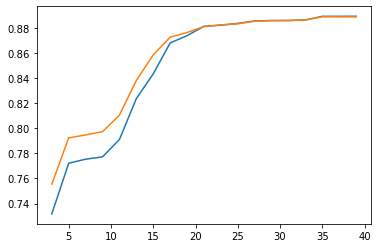

In [27]:
column_names = data_vw_expanded.drop(columns = ['price']).columns

no_of_features = []
r_squared_train = []
r_squared_test = []

for k in range(3, 40, 2):
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train, y_train)
    X_test_transformed = selector.transform(X_test)
    regressor = LinearRegression()
    regressor.fit(X_train_transformed, y_train)
    no_of_features.append(k)
    r_squared_train.append(regressor.score(X_train_transformed, y_train))
    r_squared_test.append(regressor.score(X_test_transformed, y_test))
    
sns.lineplot(x = no_of_features, y = r_squared_train, legend = 'full')
sns.lineplot(x = no_of_features, y = r_squared_test, legend = 'full')

We get score of 0.88 around 23 variables befor the curve stablizes. Hence keeping k as 23 selecting 23 best variables from the dataset

In [28]:
selector=SelectKBest(f_regression,k=23)
X_train_transformed=selector.fit_transform(X_train,y_train)
X_test_transformed=selector.transform(X_test)
column_names[selector.get_support()]

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Index(['mileage', 'tax', 'mpg', 'engineSize', 'age_of_car', 'model_ Amarok',
       'model_ Arteon', 'model_ Beetle', 'model_ California',
       'model_ Caravelle', 'model_ Polo', 'model_ Sharan', 'model_ T-Roc',
       'model_ Tiguan', 'model_ Tiguan Allspace', 'model_ Touareg',
       'model_ Up', 'transmission_Automatic', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Hybrid',
       'fuelType_Petrol'],
      dtype='object')

In [31]:
from sklearn.svm import SVR

In [29]:
def regression_model(model):
    """
    Will fit the regression model passed and will return the regressor object and the score
    """
    regressor = model
    regressor.fit(X_train_transformed, y_train)
    score = regressor.score(X_test_transformed, y_test)
    return regressor, score

In [32]:
model_performance = pd.DataFrame(columns = ["Features", "Model", "Score"])

models_to_evaluate = [LinearRegression(), Ridge(), Lasso(), SVR(), RandomForestRegressor(), MLPRegressor()]

for model in models_to_evaluate:
    regressor, score = regression_model(model)
    model_performance = model_performance.append({"Features": "Linear","Model": model, "Score": score}, ignore_index=True)

model_performance

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-29-c5e7c7fe365d>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train_transformed, y_train)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,Features,Model,Score
0,Linear,LinearRegression(),0.882244
1,Linear,Ridge(),0.882241
2,Linear,Lasso(),-0.000078
3,Linear,SVR(),0.939627
4,Linear,"(DecisionTreeRegressor(max_features='auto', ra...",0.953361
5,Linear,MLPRegressor(),0.942873


# Backward selection for variable selection on linear regression

Fitting a linear regression model and checking the model parameters

In [33]:
regressor=sm.OLS(y_train,X_train).fit()
print(regressor.summary())

X_train_dropped = X_train.copy()

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.889
Model:                            OLS   Adj. R-squared (uncentered):              0.889
Method:                 Least Squares   F-statistic:                              2524.
Date:                Mon, 11 Jan 2021   Prob (F-statistic):                        0.00
Time:                        17:50:45   Log-Likelihood:                         -3718.9
No. Observations:               11367   AIC:                                      7510.
Df Residuals:                   11331   BIC:                                      7774.
Df Model:                          36                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [34]:
while True:
    if max(regressor.pvalues) > 0.05:
        drop_variable = regressor.pvalues[regressor.pvalues == max(regressor.pvalues)]
        print("Dropping " + drop_variable.index[0] + " and running regression again because pvalue is: " + str(drop_variable[0]))
        X_train_dropped = X_train_dropped.drop(columns = [drop_variable.index[0]])
        regressor = sm.OLS(y_train, X_train_dropped).fit()
    else:
        print("All p values less than 0.05")
        break

Dropping model_ Eos and running regression again because pvalue is: 0.9810003110215575
Dropping model_ Caddy and running regression again because pvalue is: 0.777537452285809
Dropping model_ Caddy Maxi and running regression again because pvalue is: 0.8403805327533118
Dropping model_ Golf and running regression again because pvalue is: 0.2825195077945617
Dropping model_ Passat and running regression again because pvalue is: 0.8885004127690289
Dropping model_ Beetle and running regression again because pvalue is: 0.6818577676258903
All p values less than 0.05


(11367, 820)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:307: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\Users\hp\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for

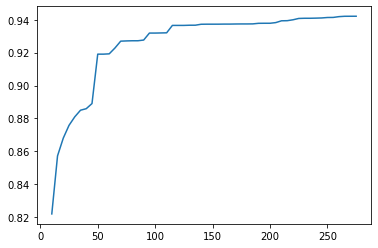

In [35]:
poly = PolynomialFeatures()
X_train_transformed_poly = poly.fit_transform(X_train)
X_test_transformed_poly = poly.transform(X_test)

print(X_train_transformed_poly.shape)

no_of_features = []
r_squared = []

for k in range(10, 277, 5):
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
    regressor = LinearRegression()
    regressor.fit(X_train_transformed, y_train)
    no_of_features.append(k)
    r_squared.append(regressor.score(X_train_transformed, y_train))
    
sns.lineplot(x = no_of_features, y = r_squared)

From the above graph we can see that we are hitting 0.93 score around 110 features.

In [36]:
selector = SelectKBest(f_regression, k = 110)
X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
X_test_transformed = selector.transform(X_test_transformed_poly)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\hp\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:307: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\Users\hp\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [37]:
models_to_evaluate = [LinearRegression(), Ridge(), Lasso(), SVR(), RandomForestRegressor(), MLPRegressor()]

for model in models_to_evaluate:
    regressor, score = regression_model(model)
    model_performance = model_performance.append({"Features": "Polynomial","Model": model, "Score": score}, ignore_index=True)

model_performance

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-29-c5e7c7fe365d>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train_transformed, y_train)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,Features,Model,Score
0,Linear,LinearRegression(),0.882244
1,Linear,Ridge(),0.882241
2,Linear,Lasso(),-0.000078
3,Linear,SVR(),0.939627
4,Linear,"(DecisionTreeRegressor(max_features='auto', ra...",0.953361
5,Linear,MLPRegressor(),0.942873
6,Polynomial,LinearRegression(),0.932208
7,Polynomial,Ridge(),0.932221
8,Polynomial,Lasso(),0.133785
9,Polynomial,SVR(),0.943659
